# Find links to Google Arts & Culture webpages of all artists

In [1]:
from artscraper import get_artist_links

In [2]:
# Get links for all artists, as a list
artist_urls = get_artist_links(executable_path='geckodriver', min_wait_time=1, output_file='artist_links.txt')

# Collect artworks and metadata for all artists

In [3]:
from artscraper import GoogleArtScraper, FindArtworks

In [4]:
# Small subset of artist links, for illustration purposes
# (3 artists, each with < 5 artworks)
artist_urls = ['https://artsandculture.google.com/entity/william-notman/m04mpzj',
               'https://artsandculture.google.com/entity/alexander-keirincx/m03cxjmm',
               'https://artsandculture.google.com/entity/abraham-lambertsz-van-den-tempel/m09g78pg'
            ]

In [5]:
# Directory in which the data is to be stored
output_dir = './data'

In [6]:
%%time 

# Find_artworks for each artist
for artist_url in artist_urls:
    with FindArtworks(artist_link=artist_url, output_dir=output_dir, min_wait_time=1) as scraper:
            # Save list of works, description, and metadata for an artist
            scraper.save_artist_information()
            # Get list of links to this artist's works 
            artwork_links = scraper.get_artist_works()
            # Create directory for this artist
            artist_dir = output_dir + '/' + scraper.get_wikipedia_article_title()
    # Scrape artworks
    with GoogleArtScraper(artist_dir + '/' + 'works', min_wait=1) as subscraper:
        # Go through each artwork link
        for url in artwork_links:
            subscraper.load_link(url)
            subscraper.save_metadata()
            subscraper.save_image()

CPU times: user 362 ms, sys: 76.3 ms, total: 438 ms
Wall time: 1min 50s


# Display results

### Display contents of data directory

In [7]:
!ls data

Abraham_Lambertsz_van_den_Tempel  Alexander_Keirincx  William_Notman


### Display contents of directory for one artist

In [8]:
!ls ./data/Abraham_Lambertsz_van_den_Tempel/

description.txt  metadata.txt  works  works.txt


### Description of artist

In [9]:
!cat ./data/Abraham_Lambertsz_van_den_Tempel/description.txt

Abraham van den Tempel (c.1622 – 8 October 1672) was a Dutch Golden Age painter.

### Metadata of artist

In [10]:
!cat ./data/Abraham_Lambertsz_van_den_Tempel/metadata.txt

family name : 
given name : Abraham
sex or gender : male
date of birth : 1622-01-01
place of birth : Leeuwarden
latitude of place of birth : 53.2
longitude of place of birth : 5.783333333
date of death : 1672-10-08
place of death : Amsterdam
latitude of place of death : 52.372777777
longitude of place of death : 4.893611111
country of citizenship : ['Netherlands']
residence : []
work location : ['Amsterdam', 'Leeuwarden', 'Leiden']
genre : ['portrait']
movement : ['Baroque']


### Directory containing works of this artist

In [11]:
!ls ./data/Abraham_Lambertsz_van_den_Tempel/works

portrait-of-albertine-agnes-of-nassau-with-her-three-children-abraham-van-den-tempel_6QF1KLTiJcR9Lw
portrait-of-helena-grondt-1613-14-after-1665-tempel-abraham-van-den_mQEfvvPkgk-P8w
portrait-of-jan-antonides-van-der-linden-1609-1664-tempel-abraham-van-den_YAE0h4rEulJiRQ
the-finding-of-moses-bartholomeus-breenbergh_KwHTcCRlV5LJ9g


### Directory containing one artwork by this artist

In [12]:
!ls ./data/Abraham_Lambertsz_van_den_Tempel/works/the-finding-of-moses-bartholomeus-breenbergh_KwHTcCRlV5LJ9g/

artwork.png  metadata.json


### Display the artwork

In [13]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

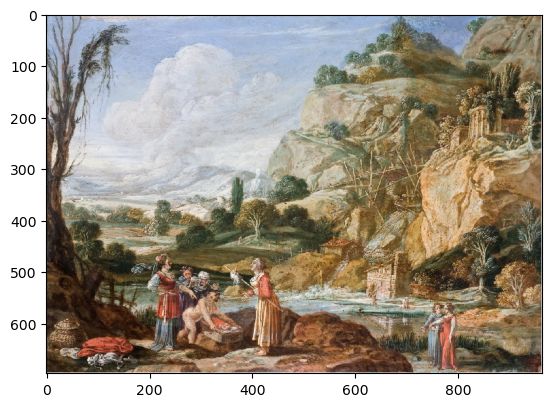

In [14]:
img = mpimg.imread("./data/Abraham_Lambertsz_van_den_Tempel/works/the-finding-of-moses-bartholomeus-breenbergh_KwHTcCRlV5LJ9g/artwork.png")
plt.imshow(img)
plt.show()

### Display metadata for this artwork

In [15]:
!cat ./data/Abraham_Lambertsz_van_den_Tempel/works/the-finding-of-moses-bartholomeus-breenbergh_KwHTcCRlV5LJ9g/metadata.json

{"main_text": "This is the earliest signed and dated painting by Breenbergh and so is a key work for our knowledge of his early years in Italy. He had arrived in Rome late in 1619 and was to remain there for ten years. This exquisiste small copper panel display the profound influence on the young Bereenbergh of Jacob Pynas, who had left Rome to return to Holland in 1608 but whose influence on young Dutch artists was still pervasive. The antique building on the rocky hillside is the Tempel of the Sibyl at Tivoli, which was often drawn by Northern artists, including Breenbergh. The painting is signed B Breenborch (BB as monogramme) F.ao 1622.", "title": "The Finding of Moses", "creator": "Bartholomeus Breenbergh", "date created": "1622", "tags": "Dutch", "provenance": "Fredrik M\u00fcller & Cie., Amsterdam, C.U.Palm, Bukowskis, Stockholm, Wilhelmina von Hallwyl, Stockholm 1904", "physical dimensions": "w250 x h185 mm (Without frame)", "painter": "Bartholomeus Breenbergh", "artist info": 